In [12]:
#libraries
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [3]:
#Read the data
df=pd.read_csv('news.csv')
#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
# Check for missing values in the entire dataset
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


In [4]:
#Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [7]:
#Training and Test split
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [8]:
#TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [9]:
#PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.74%


In [10]:
#confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[590,  48],
       [ 44, 585]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, pos_label='FAKE')
recall = recall_score(y_test, y_pred, pos_label='FAKE')
f1 = f1_score(y_test, y_pred, pos_label='FAKE')

print(f'Precision: {precision}, Recall: {recall}, F1-Score: {f1}')

Precision: 0.9305993690851735, Recall: 0.9247648902821317, F1-Score: 0.9276729559748429


In [11]:
#cross-validation
cv_scores = cross_val_score(pac, tfidf_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.93786982 0.94674556 0.93786982 0.93188549 0.93484699]


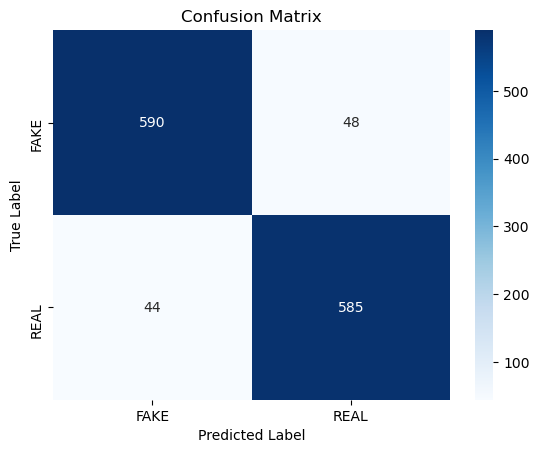

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier

#Trying RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(tfidf_train, y_train)
y_pred_rfc = rfc.predict(tfidf_test)
score_rfc = accuracy_score(y_test, y_pred_rfc)
print(f'Random Forest Accuracy: {round(score_rfc*100, 2)}%')

Random Forest Accuracy: 90.61%


In [15]:
from sklearn.ensemble import VotingClassifier

#Trying VotingClassifier with multiple models
ensemble_classifier = VotingClassifier(estimators=[('pac', pac), ('rfc', rfc)], voting='hard')
ensemble_classifier.fit(tfidf_train, y_train)
y_pred_ensemble = ensemble_classifier.predict(tfidf_test)
score_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble Model Accuracy: {round(score_ensemble*100, 2)}%')

Ensemble Model Accuracy: 91.87%
